In [1]:
# Identify PCA loading coefficients
# https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn/34692511#34692511?newreg=3e0374969e124a53953c709a83ade4bd

import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans

data = pd.read_csv('/Volumes/Windows HD/PhD/team_size_aggregate.tsv', '\t')


In [3]:
numerical_data = data[['LOC', 'Project Revision Count', 'Project Author Count', 'CBO', 'DIT', 'LCOM', 'NOC', 'RFC', 'WMC']]


In [4]:
# normalize data
# https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(numerical_data), columns = numerical_data.columns) 


# PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

# Dump components relations with features:
loading_coefficients = pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2'])
loading_coefficients

,LOC,Project Revision Count,Project Author Count,CBO,DIT,LCOM,NOC,RFC,WMC
PC-1,0.269028,0.079224,0.167805,0.388357,0.371543,0.293887,0.410421,0.484258,0.339122
PC-2,-0.333882,-0.097024,-0.292465,-0.256598,-0.221117,0.523191,-0.250508,0.183967,0.555438


In [6]:
x = reduced_data[:,0]
y = reduced_data[:,1]
c = data['Project Name']
         
fig, ax = plt.subplots(figsize=(200, 100))
ax.scatter(x, y)

for i, txt in enumerate(c):
    if txt=='scapi':
        ax.annotate(txt, (x[i],y[i]))

plt.show()

In [7]:
reduced_data[:,0]

array([  6.17122699e+00,  -2.74615588e+00,  -2.08041693e+00,
        -2.31183665e+00,  -3.09620237e+00,  -2.94615012e+00,
        -2.37062203e+00,  -2.37060788e+00,  -1.83097291e+00,
        -2.49703432e+00,  -2.90699152e+00,  -1.83234285e+00,
        -1.83240056e+00,  -3.09543767e+00,  -2.18246737e+00,
        -1.83234285e+00,  -3.09378123e+00,  -1.96101331e+00,
        -2.55473902e+00,  -2.69081565e+00,  -3.16387225e+00,
        -3.09520786e+00,  -1.95946478e+00,  -3.09597177e+00,
        -3.28185014e+00,  -2.55848864e+00,  -1.79827705e+00,
        -3.09631767e+00,  -2.55788333e+00,  -3.09527907e+00,
        -3.09653398e+00,  -2.30234665e+00,   1.32762332e+00,
        -2.29269212e+00,   3.84919399e+00,  -3.41165633e+00,
        -1.56662341e+00,  -1.99823350e+00,  -2.11077906e+00,
        -2.11751198e+00,  -2.45432342e+00,   7.26796073e-02,
        -9.21196230e-01,  -1.83619912e+00,  -1.85738255e+00,
        -1.99175101e+00,  -2.13845948e+00,  -1.93019864e+00,
        -2.04389831e+00,

In [8]:
reduced_data[:,1]

array([ -3.81390229e+00,  -1.47798775e+00,  -1.28361391e+00,
        -3.69403671e-01,  -8.68793002e-01,  -1.22801406e+00,
        -1.31293972e+00,  -1.31296201e+00,  -1.30710217e+00,
        -1.00161170e+00,  -6.66186607e-01,  -1.30541616e+00,
        -1.30534571e+00,  -8.69726677e-01,  -1.43735415e+00,
        -1.30541616e+00,  -8.71800157e-01,   1.86104475e-02,
        -1.09524555e+00,  -9.96159855e-01,  -1.07142264e+00,
        -8.70026078e-01,  -1.32152724e+00,  -8.69079188e-01,
        -1.07576233e+00,  -1.18888631e+00,  -7.19946931e-01,
        -8.68649910e-01,  -1.18963755e+00,  -8.69922328e-01,
        -8.68383813e-01,  -1.03801742e+00,  -1.07643552e+00,
        -7.72067278e-01,  -3.30257502e+00,  -2.79799942e-01,
        -1.36344584e-01,  -7.83881294e-03,  -1.14686499e+00,
        -4.70143469e-01,  -7.10000044e-01,  -3.01573098e+00,
        -2.45432672e+00,  -9.57333126e-01,  -7.41382999e-01,
        -9.60276799e-01,   2.61118878e-01,  -8.97761790e-01,
        -8.46582782e-01,

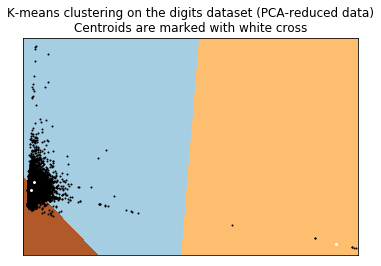

array([[  0.60882782,   0.94474252],
       [ 78.94262091,  -9.27403918],
       [ -0.32585961,  -0.46543196]])

In [61]:
# http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() - 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=4, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

centroids